In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Loading Dataset

In [17]:
df = pd.read_csv(r"N:\Encryptix Intermship\Task 2\spam.csv", encoding='latin-1')
print(df.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

# Data Preprocessing 

In [18]:
df = df.rename(columns={"v1": "label", "v2": "text"})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Vectorization
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Train the model (Logistic Regression)

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model initialization and training
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

# Model Evaluation

Accuracy: 0.9779
Precision: 0.9840
Recall: 0.8447
F1 Score: 0.9091


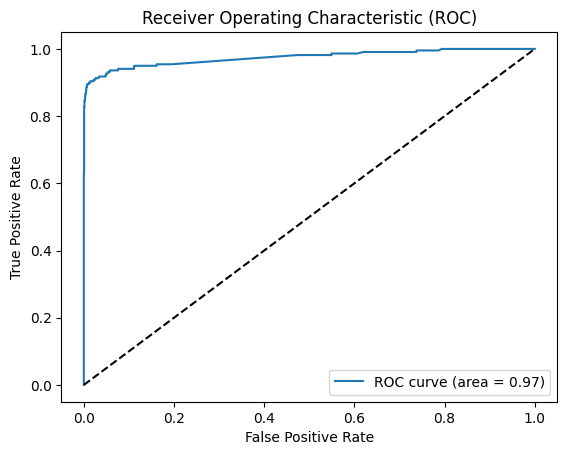

In [20]:
y_pred = model.predict(X_test)


# Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Function to preprocess and predict a custom SMS message
def predict_custom_sms(sms_message):
    # Preprocess the custom message
    sms_message = [sms_message]  # Convert to a list
    sms_transformed = vectorizer.transform(sms_message)  # Transform using the same vectorizer

    # Predict the label using the trained model
    prediction = model.predict(sms_transformed)

    # Map the prediction to the corresponding label
    label = 'spam' if prediction[0] == 1 else 'ham'
    return label

# Example custom SMS message
custom_sms = "Congratulations! You've been selected to receive a $1000 DMart gift card. Go to www.fakewebsite.com to claim your prize. Hurry, this offer expires soon!"

# Predict the label of the custom SMS message
predicted_label = predict_custom_sms(custom_sms)
print(f"The custom SMS message is classified as: {predicted_label}")

The custom SMS message is classified as: spam
